In [ ]:
###################### Load Libraries and Modules ######################

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import itertools
from google.colab import drive

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HW4.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks


## Question a - Data Exploration

In [ ]:
df.head()

X = df.iloc[:,:24]

features = []
for col in X.columns:
  features.append(col)

y = df.iloc[:,24]
num_col = ['Freq', 'last_update_days_ago', '1st_update_days_ago', 'Spending']

       sequence_number           US     source_a     source_c     source_b  \
count      2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean       1000.500000     0.824500     0.126500     0.056000     0.060000   
std         577.494589     0.380489     0.332495     0.229979     0.237546   
min           1.000000     0.000000     0.000000     0.000000     0.000000   
25%         500.750000     1.000000     0.000000     0.000000     0.000000   
50%        1000.500000     1.000000     0.000000     0.000000     0.000000   
75%        1500.250000     1.000000     0.000000     0.000000     0.000000   
max        2000.000000     1.000000     1.000000     1.000000     1.000000   

          source_d     source_e    source_m     source_o     source_h  ...  \
count  2000.000000  2000.000000  2000.00000  2000.000000  2000.000000  ...   
mean      0.041500     0.151000     0.01650     0.033500     0.052500  ...   
std       0.199493     0.358138     0.12742     0.179983     0.

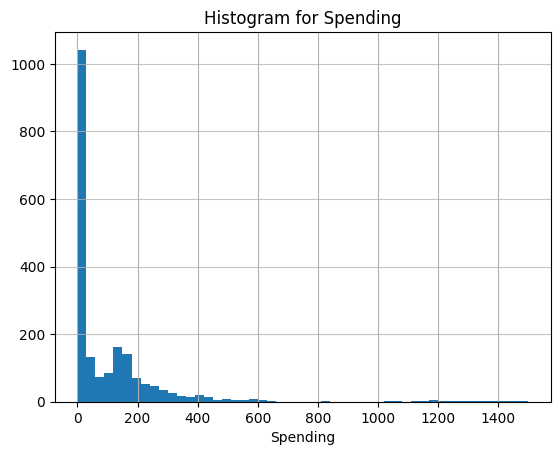

In [ ]:
import matplotlib.pyplot as plt

print(df.describe())

df['Spending'].hist(grid=True,bins=50)
plt.title('Histogram for Spending')
plt.xlabel('Spending')
plt.grid(axis='y',alpha=0.75)
plt.show()

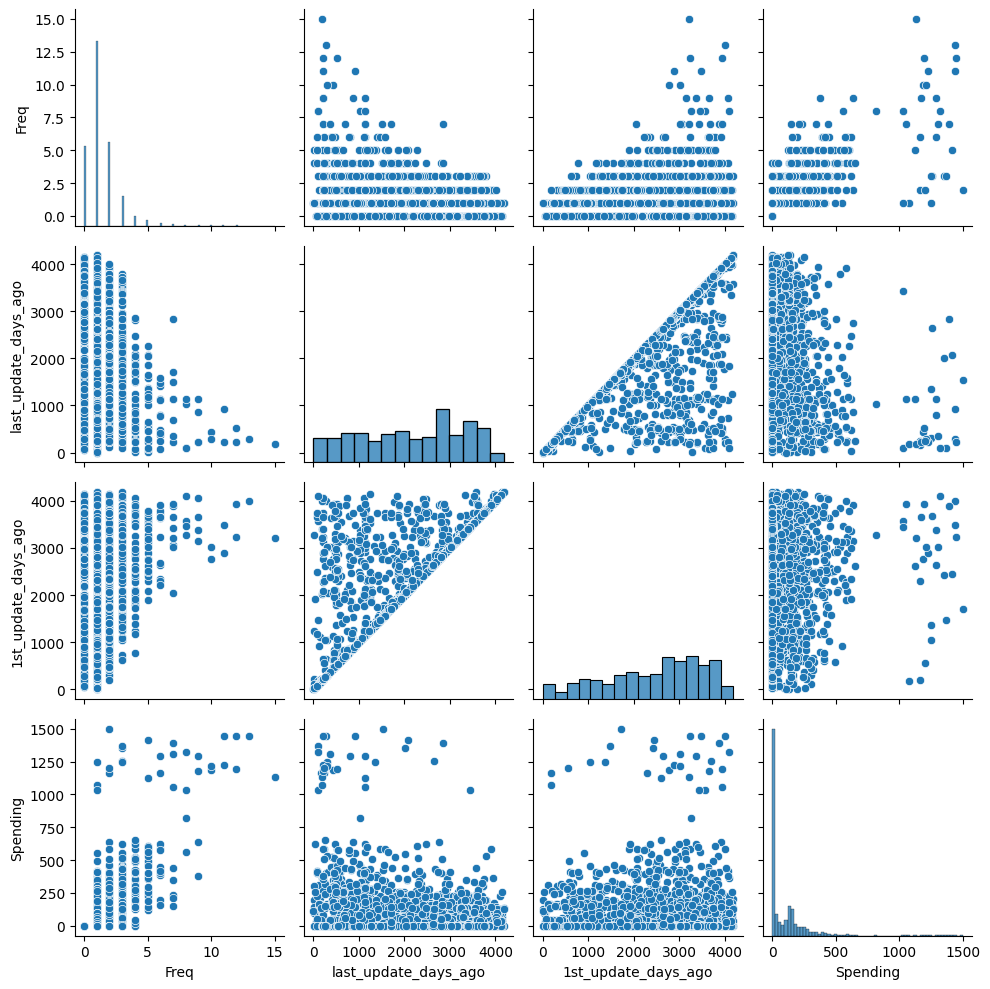

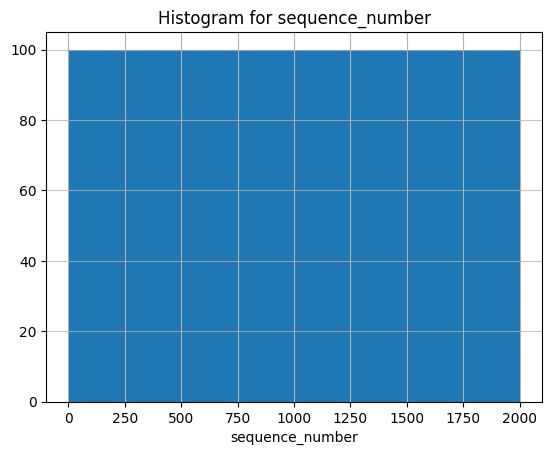

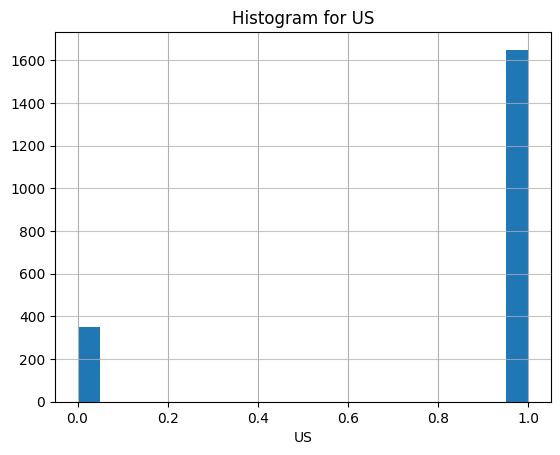

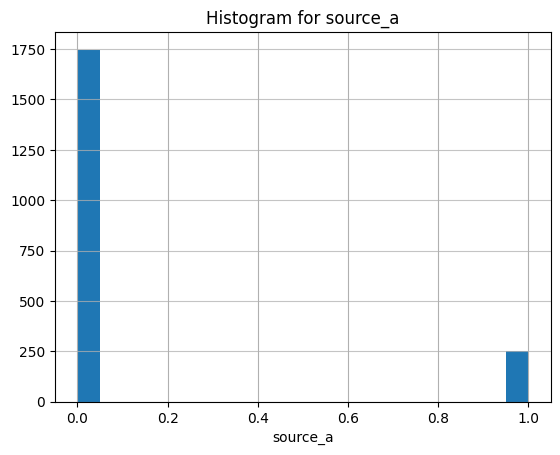

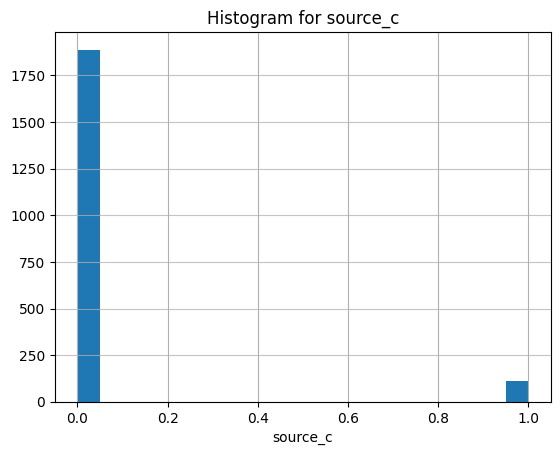

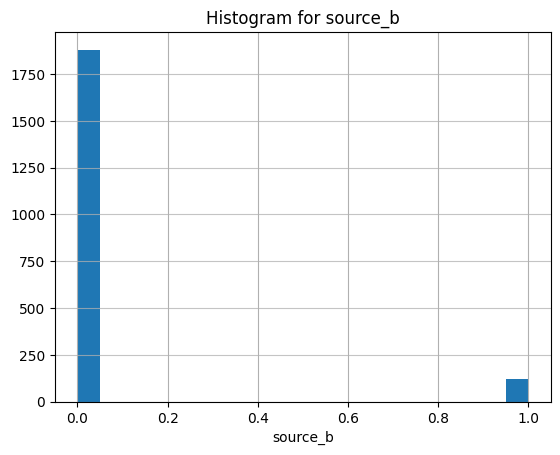

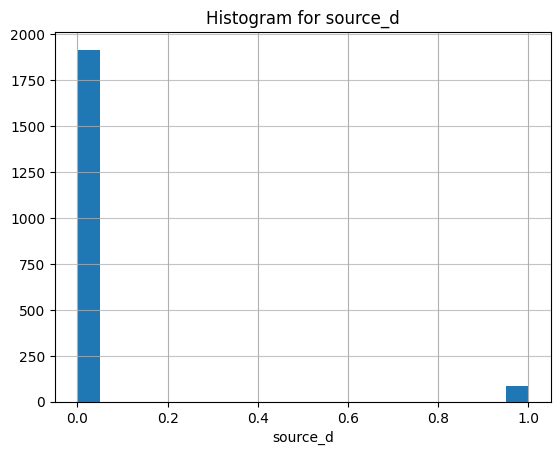

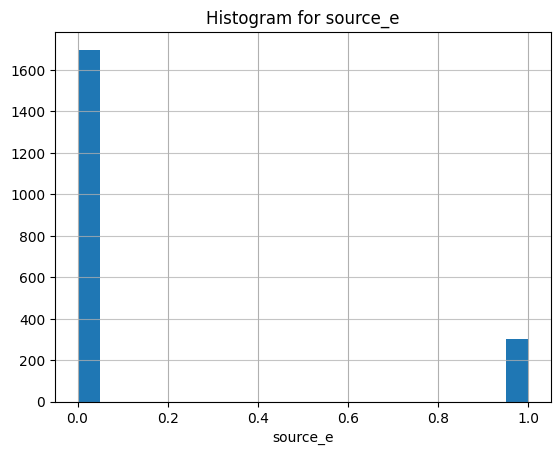

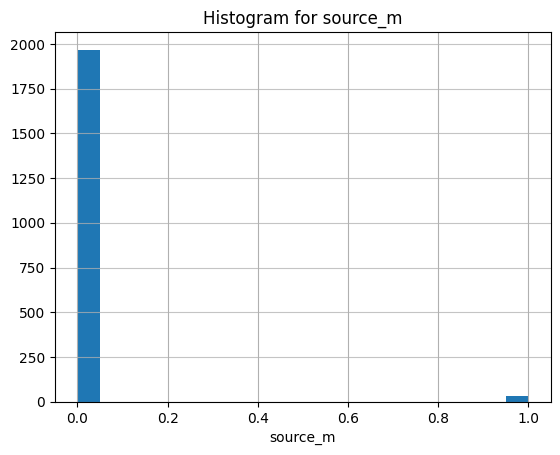

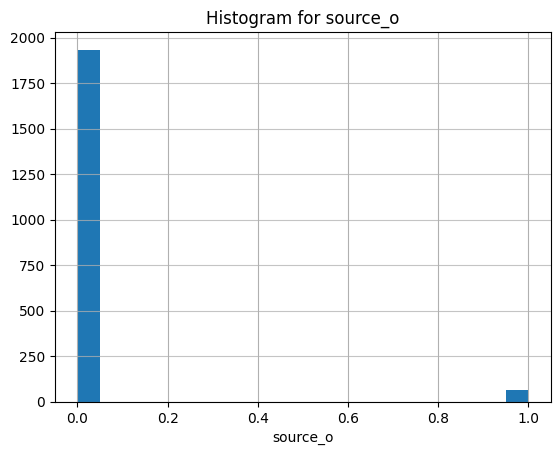

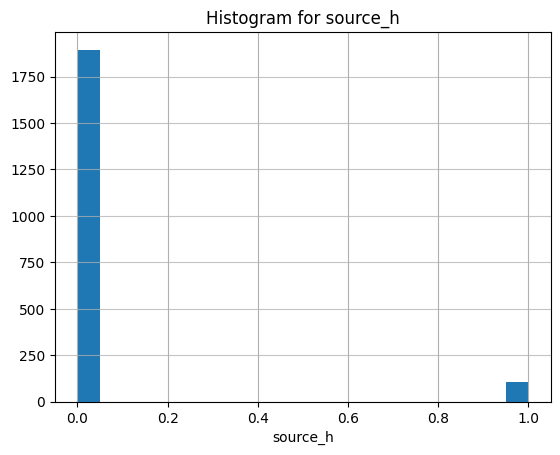

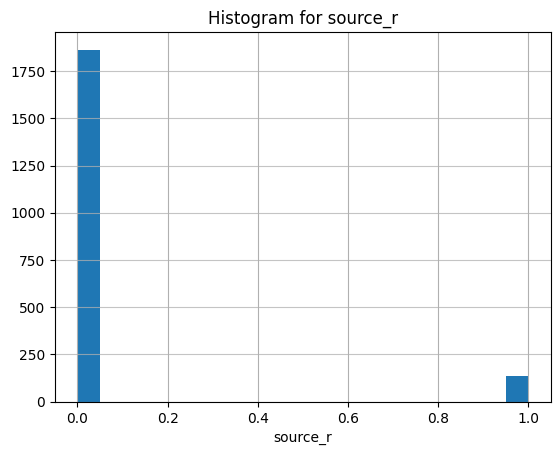

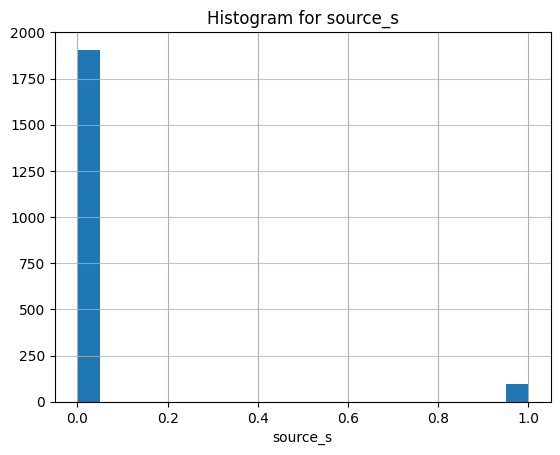

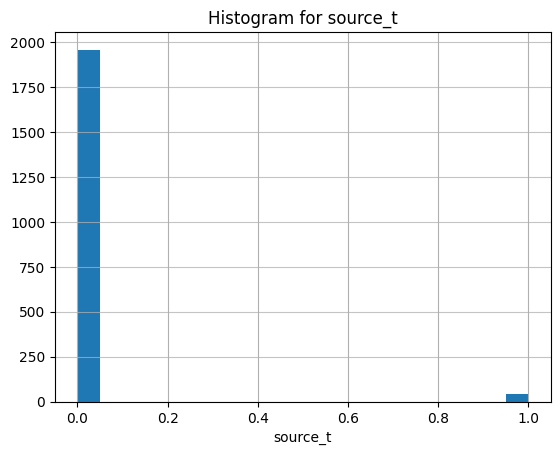

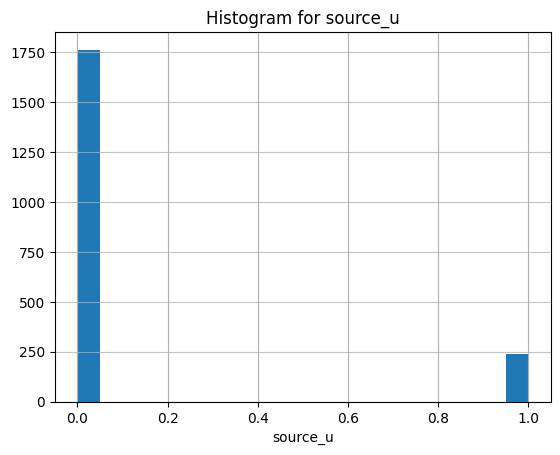

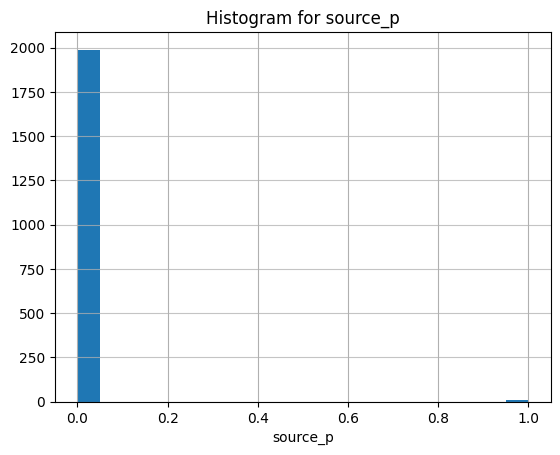

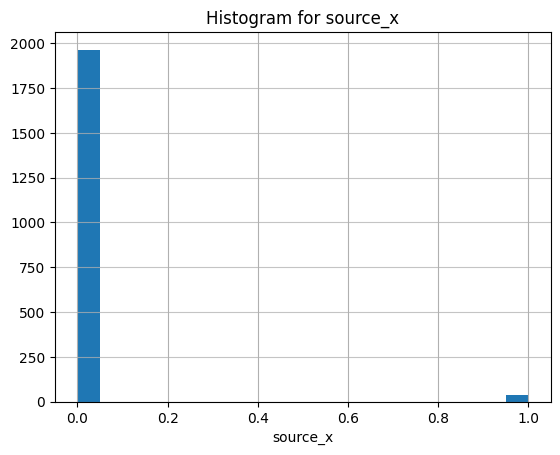

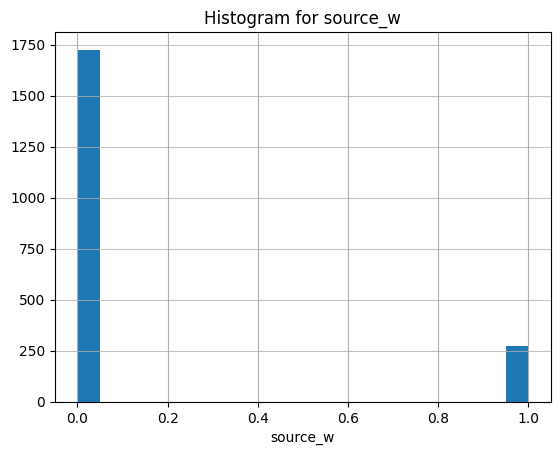

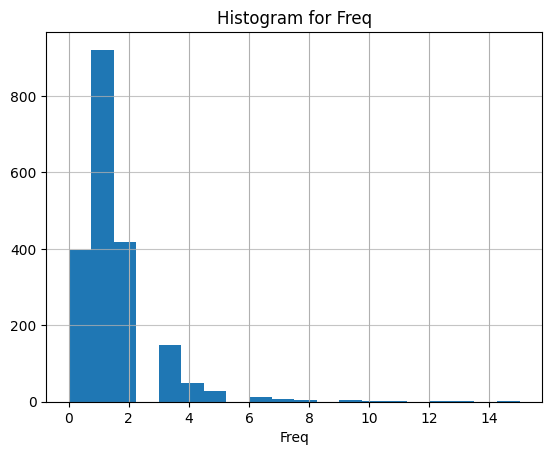

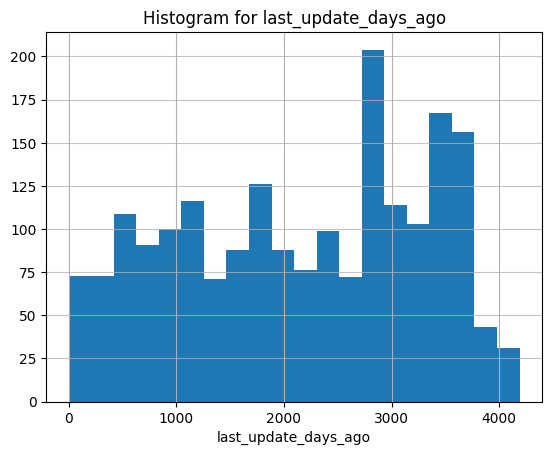

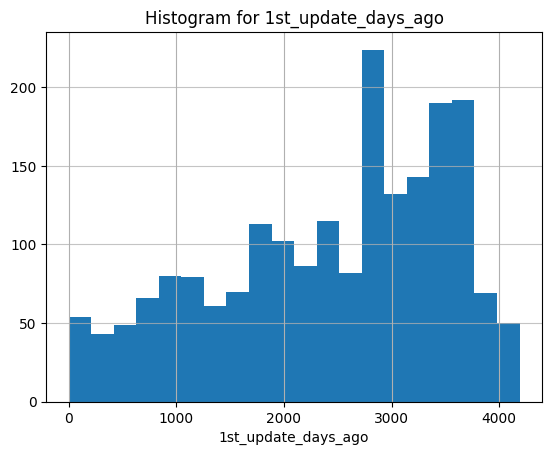

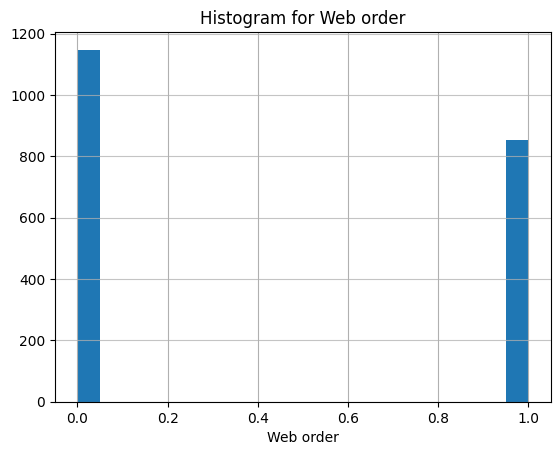

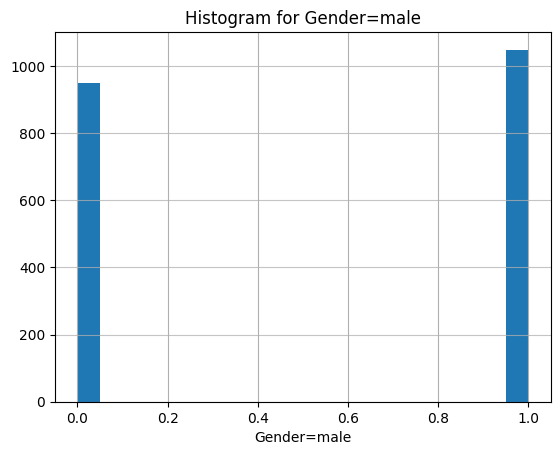

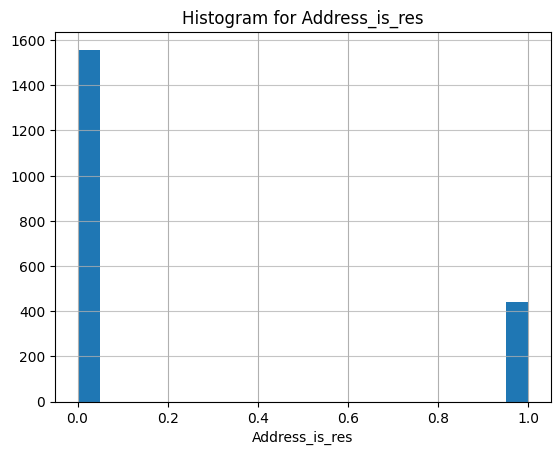

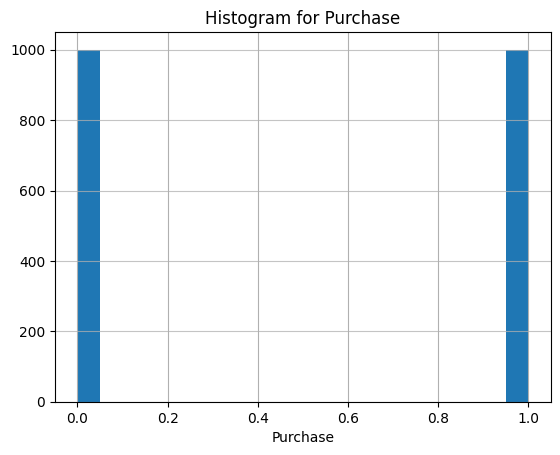

<ipython-input-5-a5c9816664e5>:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
sequence_number,1.000,-0.037,-0.022,-0.021,0.032,0.032,0.007,0.031,-0.003,0.018,0.012,0.004,-0.019,-0.039,-0.037,0.006,0.009,-0.020,0.034,0.018,-0.006,0.015,0.002,-0.064,-0.046
US,-0.037,1.000,0.104,0.084,-0.033,0.096,-0.088,0.049,0.006,0.008,0.037,0.102,0.005,-0.037,-0.015,0.062,-0.205,0.033,0.038,0.076,0.004,0.027,0.021,0.022,0.003
source_a,-0.022,0.104,1.000,-0.093,-0.096,-0.079,-0.160,-0.049,-0.071,-0.090,-0.103,-0.085,-0.056,-0.140,-0.030,-0.052,-0.152,0.177,0.111,0.233,0.055,0.037,-0.021,0.212,0.184
source_c,-0.021,0.084,-0.093,1.000,-0.062,-0.051,-0.103,-0.032,-0.045,-0.057,-0.066,-0.054,-0.036,-0.090,-0.019,-0.033,-0.097,0.013,-0.168,-0.167,0.019,0.001,-0.046,-0.052,-0.039
source_b,0.032,-0.033,-0.096,-0.062,1.000,-0.053,-0.107,-0.033,-0.047,-0.059,-0.069,-0.056,-0.037,-0.093,-0.020,-0.034,-0.101,-0.066,0.249,0.249,-0.009,0.000,-0.084,-0.101,-0.059
source_d,0.032,0.096,-0.079,-0.051,-0.053,1.000,-0.088,-0.027,-0.039,-0.049,-0.056,-0.046,-0.031,-0.076,-0.016,-0.028,-0.083,0.047,0.136,0.149,-0.007,0.002,-0.050,0.028,0.003
source_e,0.007,-0.088,-0.160,-0.103,-0.107,-0.088,1.000,-0.055,-0.079,-0.099,-0.114,-0.094,-0.063,-0.155,-0.033,-0.057,-0.168,-0.048,0.074,0.052,-0.036,-0.018,-0.040,-0.047,-0.046
source_m,0.031,0.049,-0.049,-0.032,-0.033,-0.027,-0.055,1.000,-0.024,-0.030,-0.035,-0.029,-0.019,-0.048,-0.010,-0.018,-0.052,0.001,-0.019,-0.028,-0.016,0.021,-0.003,0.020,-0.009
source_o,-0.003,0.006,-0.071,-0.045,-0.047,-0.039,-0.079,-0.024,1.000,-0.044,-0.050,-0.041,-0.028,-0.068,-0.014,-0.025,-0.074,-0.122,0.186,0.226,-0.020,0.005,-0.052,-0.114,-0.070
source_h,0.018,0.008,-0.090,-0.057,-0.059,-0.049,-0.099,-0.030,-0.044,1.000,-0.064,-0.052,-0.035,-0.087,-0.018,-0.032,-0.094,0.112,-0.131,-0.169,-0.053,-0.036,0.404,-0.182,-0.103


In [ ]:
import seaborn as sns
sns.pairplot(df[num_col], height=2.5)
plt.tight_layout()
plt.show()


#plot hist for each columns
for i in features:
    dist = df[i]
    dist.hist(grid=True, bins=20)
    plt.title('Histogram for ' + str(i))
    plt.xlabel(i)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

## Question a - Regression Models to predict Spending

**Linear Regression Models** (Simple Linear Regression, Lasso Regression, Ridge Regression)

This Python script is designed to evaluate the performance of three types of regression models - Linear, Lasso, and Ridge - using cross-validation.

The script begins by importing necessary libraries from scikit-learn. It then specifies the features and target variable from a DataFrame df. For model validation, it employs KFold cross-validation with 10 splits, a specified random state for reproducibility, and shuffling of data before splitting.

*Linear Regression* is applied directly to the unscaled features, and its performance is evaluated in terms of negative mean absolute error (MAE). For *Lasso and Ridge regressions*, pipelines are created to first scale the features using MinMaxScaler and then apply the regression models. The scaling is crucial as Lasso and Ridge are sensitive to the scale of input features. The performance of these models is also assessed using negative MAE obtained from cross-validation, and results are printed to the console. The alpha parameter in Lasso and Ridge regressions serves as a regularization parameter, which can be tuned for optimal performance.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

# Specify features and target variable
X = df.iloc[:, 1:23]  # Ignoring sequence_number (Unique identifier) and Purchasing (Data Leakage)
y = df.iloc[:, 24]    # Target variable: spending column

# KFold cross-validation
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# ----------------- Linear Regression -----------------
linear_model = LinearRegression()
linear_scores = cross_val_score(linear_model, X, y, scoring='neg_mean_absolute_error', cv=cv)

print("\n### Linear Regression ###")
print("Performance MAE (Linear): %0.2f (+/- %0.2f)" % (-linear_scores.mean(), linear_scores.std() * 2))

# Fit the model to the entire data to get the coefficients and intercept
linear_model.fit(X, y)
print('Coefficients:', linear_model.coef_)
print('Intercept:', linear_model.intercept_)

# ----------------- Lasso Regression -----------------
lasso_pipeline = make_pipeline(MinMaxScaler(feature_range=(0, 1)), Lasso(alpha=0.1))
lasso_scores = cross_val_score(lasso_pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv)

print("\n### Lasso Regression ###")
print("Performance MAE: %0.2f (+/- %0.2f)" % (-lasso_scores.mean(), lasso_scores.std() * 2))

# Fit the model to the entire data to get the coefficients and intercept
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(MinMaxScaler(feature_range=(0, 1)).fit_transform(X), y)
print('Coefficients:', lasso_model.coef_)
print('Intercept:', lasso_model.intercept_)

# ----------------- Ridge Regression -----------------
ridge_pipeline = make_pipeline(MinMaxScaler(feature_range=(0, 1)), Ridge(alpha=0.1))
ridge_scores = cross_val_score(ridge_pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv)

print("\n### Ridge Regression ###")
print("Performance MAE: %0.2f (+/- %0.2f)" % (-ridge_scores.mean(), ridge_scores.std() * 2))


# Fit the model to the entire data to get the coefficients and intercept
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(MinMaxScaler(feature_range=(0, 1)).fit_transform(X), y)
print('Coefficients:', ridge_model.coef_)
print('Intercept:', ridge_model.intercept_)



### Linear Regression ###
Performance MAE (Linear): 76.96 (+/- 13.13)
Coefficients: [-4.93672127e+00  3.16669544e+01 -5.03394015e+01 -5.34221982e+00
 -2.31107912e+01 -5.64925448e+00 -1.33232080e+01  2.05612906e+01
 -1.01507902e+02  3.73220305e+01 -9.94076255e+00 -1.18266610e+01
  3.29968621e+01 -8.84413229e+00  3.37631673e+00  3.16051739e+00
  9.18543670e+01 -1.43217464e-02  3.05734208e-03  1.15676242e+01
 -3.03958640e+00 -6.55771040e+01]
Intercept: 10.652794792565729

### Lasso Regression ###
Performance MAE: 76.80 (+/- 13.09)
Coefficients: [-4.48522726e+00  3.61719413e+01 -4.41940090e+01 -0.00000000e+00
 -1.58002120e+01 -6.12167153e-01 -3.02330584e+00  2.18388913e+01
 -9.55831159e+01  4.02253999e+01 -4.00519918e+00 -2.39111372e+00
  3.68951339e+01 -0.00000000e+00  1.90992557e+00  6.31835038e+00
  1.36631934e+03 -5.70617873e+01  8.84841956e+00  1.14539698e+01
 -2.64471511e+00 -6.46690818e+01]
Intercept: 7.372727828113199

### Ridge Regression ###
Performance MAE: 76.83 (+/- 13.09)
Co

**kNN Regressor Model**

In [ ]:
##################################### kNN Regressor  #####################################

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from math import sqrt

pipe = Pipeline([
        ('sc', MinMaxScaler(feature_range=(0, 1))),
        ('knn', KNeighborsRegressor())
      ])
pipe.fit(X,y)

scores = cross_val_score(pipe,
                         X,
                         y,
                         scoring='neg_mean_absolute_error',
                         cv=10)
print("\n### kNN Regression ###")
print("Performance MAE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std())) #estimate mean and std from cross validation




### kNN Regression ###
Performance MAE: 89.31 (+/- 11.74)


**Regressor Tree Model**


### Regressor Tree ###
Performance MAE: 83.70 (+/- 9.56)


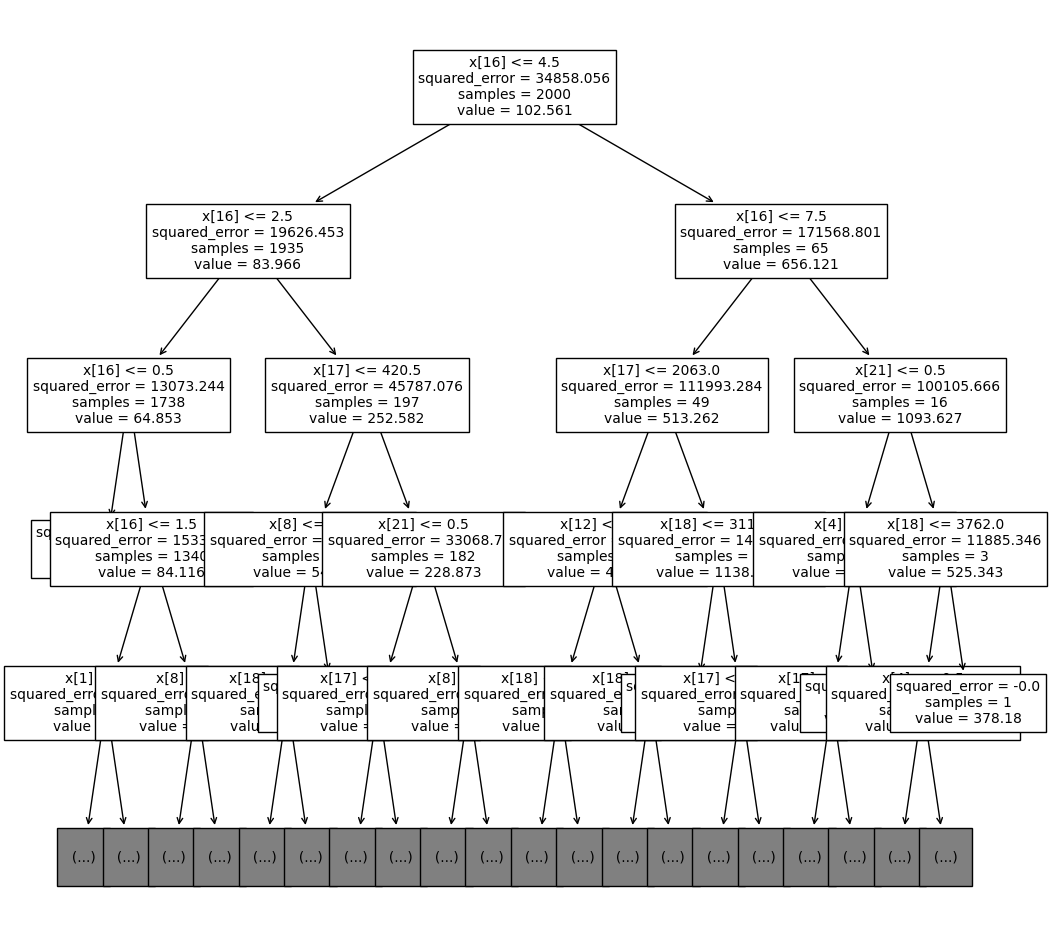

In [ ]:
#################################### Regressor Tree  ####################################
from sklearn.tree import DecisionTreeRegressor #Documentation available here http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import plot_tree

regtree = DecisionTreeRegressor(random_state=42)
regtree.fit(X,y)

scores = cross_val_score(regtree,
                         X,
                         y,
                         scoring='neg_mean_absolute_error',
                         cv=10)
print("\n### Regressor Tree ###")
print("Performance MAE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std())) #estimate mean and std from cross validation

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(regtree, fontsize=10,max_depth=4)
plt.show()


Based on the provided Mean Absolute Error (MAE) values from the 10-fold cross-validation, the Lasso Regression model performs slightly better than the other models, with the lowest MAE of 76.80. The regularization term in Lasso may have helped in feature selection or reducing overfitting, leading to slightly improved performance.

The performances of the Linear and Ridge Regression models are very similar to that of the Lasso model, with only marginal differences in their MAEs. The k-Nearest Neighbors (kNN) Regression and Regressor Tree models perform worse than the linear models, with higher MAEs of 89.31 and 83.70, respectively.

## Question b - Feature Engineering

The following code snippet is performing two main tasks to transform the input features, aiming to potentially improve the performance of the machine learning models.



**Calculating Date Difference**:
The first transformation involves creating a new feature named 'update_dates_diff'. This feature is calculated by subtracting 'last_update_days_ago' from '1st_update_days_ago'. It aims to capture the time duration between the first and the last update to a customer's record, which might provide insights into the customer's activity or engagement level over time. After this new feature is created, the original features '1st_update_days_ago' and 'last_update_days_ago' are dropped from the dataset to avoid redundancy.

**Creating Interaction Terms**:
The second part of the transformation involves creating interaction features to capture the relationships between existing features, which can sometimes enhance the model's ability to learn complex patterns. In this case, three new features are created:

'intersection': This is the product of 'Freq' (number of transactions in the last year at source catalog) and 'update_dates_diff' (the newly created feature). It aims to capture how the frequency of transactions is related to the time duration between the first and last updates to a customer's record.

'Freq^2': This is the square of 'Freq'. Squaring a feature can help in capturing non-linear patterns and is particularly useful for models that are inherently linear.

'update_dates_diff^2': Similar to 'Freq^2', this is the square of 'update_dates_diff'. It helps in capturing non-linear patterns associated with the time duration between updates.

**Feature Engineering**

In [ ]:
def engineer_features(df):
    """
    This function takes a DataFrame and returns it with additional engineered features.

    :param df: Original DataFrame
    :return: DataFrame with additional engineered features
    """

    # Creating a copy of the original DataFrame to avoid modifying it
    X_trans = df.copy()

    # Calculating the difference in days between the first and last update
    X_trans['update_dates_diff'] = X_trans['1st_update_days_ago'] - X_trans['last_update_days_ago']

    # It's an option to keep or drop the original date features based on model performance
    X_trans.drop(['1st_update_days_ago', 'last_update_days_ago'], axis=1, inplace=True)

    # Creating interaction terms to capture the combined effect of frequency of transactions
    # and the time duration between the first and last updates
    X_trans['intersection'] = X_trans['Freq'] * X_trans['update_dates_diff']

    # Adding polynomial features to capture non-linear patterns (optional based on EDA and model performance)
    X_trans['Freq^2'] = X_trans['Freq']**2
    X_trans['update_dates_diff^2'] = X_trans['update_dates_diff']**2

    return X_trans

# Applying feature engineering on the DataFrame X
X_trans = engineer_features(X)

# Printing to view the transformed DataFrame
print(X_trans.head())


   US  source_a  source_c  source_b  source_d  source_e  source_m  source_o  \
0   1         0         0         1         0         0         0         0   
1   1         0         0         0         0         1         0         0   
2   1         0         0         0         0         0         0         0   
3   1         0         1         0         0         0         0         0   
4   1         0         1         0         0         0         0         0   

   source_h  source_r  ...  source_x  source_w  Freq  Web order  Gender=male  \
0         0         0  ...         0         0     2          1            0   
1         0         0  ...         0         0     0          1            1   
2         0         0  ...         0         0     2          0            0   
3         0         0  ...         0         0     1          0            1   
4         0         0  ...         0         0     1          0            0   

   Address_is_res  update_dates_diff  inters

**Model Performance after Feature Engineering**

The code below  runs the previously mentioned models (Linear Regression, Lasso, Ridge, kNN Regressor, and Regressor Tree) on the newly engineered dataset. We use the dataset after performing feature engineering and also use 10-fold cross-validation to evaluate the models' performances on the transformed dataset.



In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np

# KFold cross-validation
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Models (Added kNN and Regressor Tree)
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", make_pipeline(MinMaxScaler(feature_range=(0, 1)), Lasso(alpha=0.1))),
    ("Ridge Regression", make_pipeline(MinMaxScaler(feature_range=(0, 1)), Ridge(alpha=0.1))),
    ("kNN Regressor", make_pipeline(MinMaxScaler(feature_range=(0, 1)), KNeighborsRegressor())),
    ("Regressor Tree", DecisionTreeRegressor(random_state=42))
]

# Evaluating models after feature engineering
for name, model in models:
    scores = cross_val_score(model, X_trans, y, scoring='neg_mean_absolute_error', cv=cv)
    print(f"\n### {name} ###")
    print("Performance MAE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))



### Linear Regression ###
Performance MAE: 73.68 (+/- 13.70)

### Lasso Regression ###
Performance MAE: 73.83 (+/- 13.34)

### Ridge Regression ###
Performance MAE: 73.50 (+/- 13.77)

### kNN Regressor ###
Performance MAE: 84.33 (+/- 16.21)

### Regressor Tree ###
Performance MAE: 79.34 (+/- 19.41)


Based on the provided Mean Absolute Error (MAE) values after feature engineering, it is evident that all models, except for kNN, have improved in performance. Ridge regression showed the most improvement among the linear models, suggesting that the new features added meaningful information and the Ridge regularization effectively managed increased complexity.



**Question c**

In [ ]:
# Use feature engineered data for hyperparameter tuning
X=X_trans.copy()

**Hyperparameter Tuning for Linear Regression Model (Nested Cross-Validation)**



In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

inner_cv = KFold(n_splits=10, shuffle=True,random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True,random_state=42)

# Hyperparameter Tuning for Linear Regression
param_grid = {'fit_intercept':[True,False],
              'positive':[True,False] # When set to True, forces the coefficients to be positive
             }

gs_slr = GridSearchCV(LinearRegression(n_jobs=-1),
                      param_grid,
                      n_jobs=-1,
                      cv=inner_cv,
                      scoring='neg_mean_absolute_error')
gs_slr.fit(X, y) # Fit model

gs_slr.fit(X,y)
print("Hyperparameter Tuning for Linear Regression")
print("Non-nested Performance: ", -gs_slr.best_score_)
print("Optimal Parameter: ", gs_slr.best_params_)    # parameter setting that gave the best results on the inner cross-validation
print("Optimal Estimator: ", gs_slr.best_estimator_) # estimator that was chosen by the search, i.e. estimator which gave best score


# Outer CV
nested_score_gs_slr = cross_val_score(gs_slr,         # estimate generalization performance (outer cross-validation)
                                     X=X,
                                     y=y,
                                     scoring='neg_mean_absolute_error',
                                     cv=outer_cv)
print("Nested CV Performance MAE: ",-nested_score_gs_slr.mean(), " +/- ", nested_score_gs_slr.std())


Hyperparameter Tuning for Linear Regression
Non-nested Performance:  73.54874838729937
Optimal Parameter:  {'fit_intercept': False, 'positive': False}
Optimal Estimator:  LinearRegression(fit_intercept=False, n_jobs=-1)
Nested CV Performance MAE:  73.5487483872993  +/-  6.842574786126012


**Hyperparameter Tuning for Lasso Regression Model (Nested Cross-Validation)**


In [ ]:
from sklearn.pipeline import Pipeline

# Hyperparameter grid for Lasso
lasso_param_grid = {'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],  # Regularization strength
                    'lasso__fit_intercept': [True, False]}    # Whether to calculate the intercept for this model

gs_lasso = GridSearchCV(Pipeline([('scaler', MinMaxScaler()),
                                  ('lasso', Lasso(max_iter=10000))]),
                        lasso_param_grid,
                        n_jobs=-1,
                        cv=inner_cv,
                        scoring='neg_mean_absolute_error')
gs_lasso.fit(X, y)
print("\nHyperparameter Tuning for Lasso Regression")
print("Non-nested Performance: ", -gs_lasso.best_score_)
print("Optimal Parameter: ", gs_lasso.best_params_)
print("Optimal Estimator: ", gs_lasso.best_estimator_)

# Outer CV
nested_score_gs_lasso = cross_val_score(gs_lasso,
                                        X=X,
                                        y=y,
                                        scoring='neg_mean_absolute_error',
                                        cv=outer_cv)
print("Nested CV Performance MAE: ", -nested_score_gs_lasso.mean(), " +/- ", nested_score_gs_lasso.std())



Hyperparameter Tuning for Lasso Regression
Non-nested Performance:  73.50999139950746
Optimal Parameter:  {'lasso__alpha': 0.01, 'lasso__fit_intercept': False}
Optimal Estimator:  Pipeline(steps=[('scaler', MinMaxScaler()),
                ('lasso',
                 Lasso(alpha=0.01, fit_intercept=False, max_iter=10000))])
Nested CV Performance MAE:  73.48623366599801  +/-  6.853646580717255


**Hyperparameter Tuning for Ridge Regression Model (Nested Cross-Validation)**


In [ ]:
# Hyperparameter grid for Ridge
ridge_param_grid = {'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],  # Regularization strength
                    'ridge__fit_intercept': [True, False]} # Whether to calculate the intercept for this model

gs_ridge = GridSearchCV(Pipeline([('scaler', MinMaxScaler()),
                                  ('ridge', Ridge(max_iter=10000))]),
                        ridge_param_grid,
                        n_jobs=-1,
                        cv=inner_cv,
                        scoring='neg_mean_absolute_error')
gs_ridge.fit(X, y)
print("\nHyperparameter Tuning for Ridge Regression")
print("Non-nested Performance: ", -gs_ridge.best_score_)
print("Optimal Parameter: ", gs_ridge.best_params_)
print("Optimal Estimator: ", gs_ridge.best_estimator_)

# Outer CV
nested_score_gs_ridge = cross_val_score(gs_ridge,
                                        X=X,
                                        y=y,
                                        scoring='neg_mean_absolute_error',
                                        cv=outer_cv)
print("Nested CV Performance MAE: ", -nested_score_gs_ridge.mean(), " +/- ", nested_score_gs_ridge.std())


Hyperparameter Tuning for Ridge Regression
Non-nested Performance:  73.0888547501019
Optimal Parameter:  {'ridge__alpha': 1, 'ridge__fit_intercept': False}
Optimal Estimator:  Pipeline(steps=[('scaler', MinMaxScaler()),
                ('ridge', Ridge(alpha=1, fit_intercept=False, max_iter=10000))])
Nested CV Performance MAE:  73.0888547501019  +/-  7.029128997712918


**Hyperparameter Tuning for Regressor Tree (Nested Cross-Validation)**

In [ ]:
# Hyperparameter Tuning for Regressor Tree
parameters = {'max_depth': range(3,20),                     # range of parameters for the depth of the tree
              'criterion': ['squared_error', 'friedman_mse', 'absolute_error']}  # criterion
gs_dt = GridSearchCV(DecisionTreeRegressor(),  # GridSearchCV
                     parameters,
                     n_jobs=-1,
                     scoring='neg_mean_absolute_error',
                     cv=inner_cv)

gs_dt.fit(X,y)
print("\nHyperparameter Tuning for Tree Regressor")
print("Non-nested Performance: ", -gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)    # parameter setting that gave the best results on the inner cross-validation
print("Optimal Estimator: ", gs_dt.best_estimator_) # estimator that was chosen by the search, i.e. estimator which gave best score

# Outer CV
nested_score_gs_dt = cross_val_score(gs_dt,         # estimate generalization performance (outer cross-validation)
                                     X=X,
                                     y=y,
                                     scoring='neg_mean_absolute_error',
                                     cv=outer_cv)
print("Nested CV Performance MAE: ",-nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())


Hyperparameter Tuning for Tree Regressor
Non-nested Performance:  66.5477825
Optimal Parameter:  {'criterion': 'absolute_error', 'max_depth': 5}
Optimal Estimator:  DecisionTreeRegressor(criterion='absolute_error', max_depth=5)
Nested CV Performance MAE:  67.20071499999999  +/-  7.4268795295803764


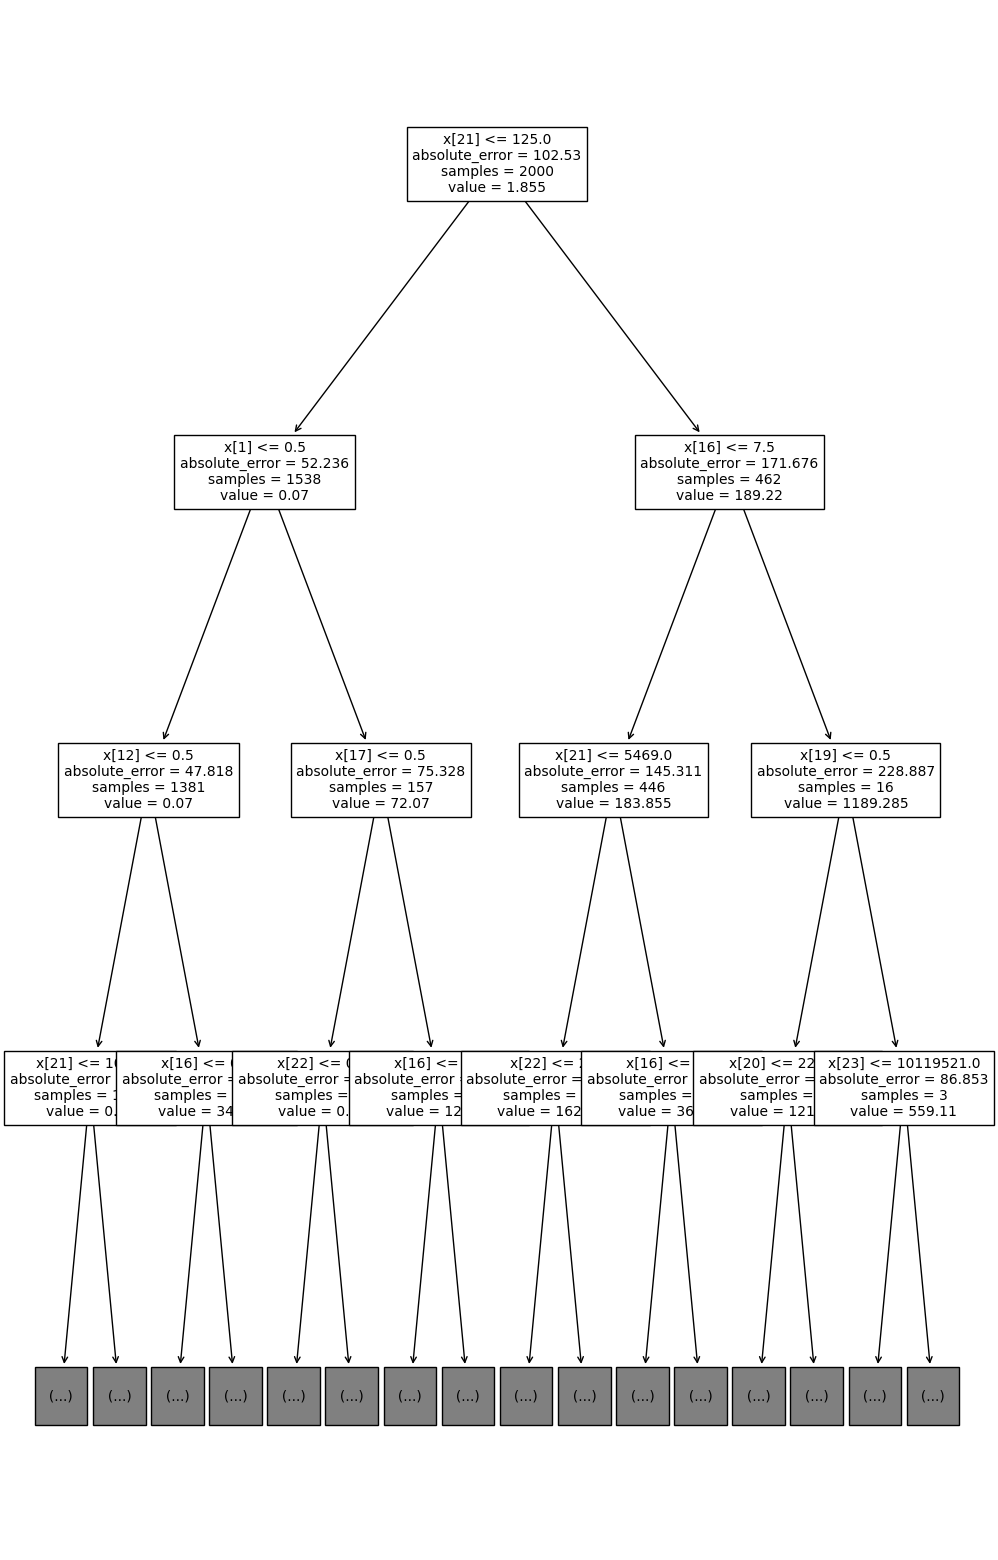

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,20))  # set plot size (denoted in inches)
plot_tree(gs_dt.best_estimator_, fontsize=10,max_depth=3)
plt.show()

**Hyperparameter Tuning for kNN Regressor (Nested Cross-Validation)**

In [ ]:
# Hyperparameter Tuning for kNN Regressor

parameters = {'knn__n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'knn__p':[1,2],                                  # when p = 1, this is equivalent to using manhattan_distance (l1),
              'knn__weights': ['uniform', 'distance']}                                                # and euclidean_distance for p = 2

pipe = Pipeline([
        ('sc', MinMaxScaler(feature_range=(0, 1))),
        ('knn', KNeighborsRegressor())
      ])

print("\nHyperparameter Tuning for kNN Regressor")
# Inner CV
gs_knn = GridSearchCV(pipe,
                         parameters,
                         cv=inner_cv,
                         scoring='neg_mean_absolute_error',              # optimizes for MSE (see note below)
                         n_jobs=-1)
gs_knn.fit(X,y)
print(gs_knn.best_params_)
print(gs_knn.best_estimator_)
print('Non-nested Performance MAE:', -gs_knn.best_score_)

# Outer CV
nested_score_gs_knn = cross_val_score(gs_knn,
                                       X=X,
                                       y=y,
                                       scoring='neg_mean_absolute_error', # optimizes for MSE (see note below)
                                       cv=outer_cv)
print("Nested CV Performance MAE: ", -nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())


Hyperparameter Tuning for kNN Regressor
{'knn__n_neighbors': 12, 'knn__p': 1, 'knn__weights': 'distance'}
Pipeline(steps=[('sc', MinMaxScaler()),
                ('knn',
                 KNeighborsRegressor(n_neighbors=12, p=1, weights='distance'))])
Non-nested Performance MAE: 78.40715656518121
Nested CV Performance MAE:  78.5651317918959  +/-  9.263707379027911


The decision tree regressor has the lowest MAE, indicating it’s the best performing model among those tested. A max depth of 5 helps to avoid overfitting. Additionally, ridge regression is performing better than both Linear and Lasso regressions. The optimal alpha is 1, indicating a balance between bias and variance.

It’s notable that the models are showing consistent performance in both non-nested and nested cross-validations. This consistency is a positive sign, indicating that the models are likely generalizing well.

**Bonus Code: Hyperparameter Tuning for kNN Regressor and Feature Selection (Forward Selection) (Nested Cross-Validation)**


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# K-Fold cross-validation
inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter grid for KNN with feature selection
knn_param_grid = {
    'knn__n_neighbors': range(1, 15),  # Number of neighbors to use
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    'sfs__n_features_to_select': ['auto'] #range(1, X.shape[1]-1)  # Number of features to select
}

# Updated pipeline with SequentialFeatureSelector for forward selection
knn_pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('sfs', SequentialFeatureSelector(KNeighborsRegressor(), direction='forward')),
    ('knn', KNeighborsRegressor())
])

# Inner CV using RandomizedSearchCV
gs_knn = RandomizedSearchCV(
    knn_pipeline,
    knn_param_grid,
    n_jobs=-1,
    n_iter=50,
    cv=inner_cv,
    scoring='neg_mean_absolute_error'
)

gs_knn.fit(X, y)
print("\nHyperparameter Tuning for KNN with Forward Selection")
print("Non-nested Performance: ", -gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)

# Outer CV
nested_score_gs_knn = cross_val_score(gs_knn, X, y, scoring='neg_mean_absolute_error', cv=outer_cv)
print("Nested CV Performance MAE: ", -nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())



Hyperparameter Tuning for KNN with Forward Selection
Non-nested Performance:  76.66193874999999
Optimal Parameter:  {'sfs__n_features_to_select': 'auto', 'knn__weights': 'uniform', 'knn__n_neighbors': 4, 'knn__metric': 'minkowski'}
Optimal Estimator:  Pipeline(steps=[('scaler', MinMaxScaler()),
                ('sfs',
                 SequentialFeatureSelector(estimator=KNeighborsRegressor(),
                                           n_features_to_select='auto')),
                ('knn', KNeighborsRegressor(n_neighbors=4))])
